# Crime Data Analysis

## Temporal Patterns
### To analyze crime patterns over time

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
crime_data = pd.read_csv('/Users/admin/projects/Data_Engineering/made-template/data/crime_data_filtered.csv')
weather_data = pd.read_csv('/Users/admin/projects/Data_Engineering/made-template/data/weather_data.csv')
#crime_data.head()
#weather_data.head()

In [4]:
# Preprocess dates
crime_data.rename(columns={'Date': 'date'}, inplace=True)
crime_data['date'] = pd.to_datetime(crime_data['date'])
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [5]:
# Merge datasets
combined_data = pd.merge(crime_data, weather_data, on='date', how='inner')

## Crime Type Distribution
### To understand the distribution of crime types

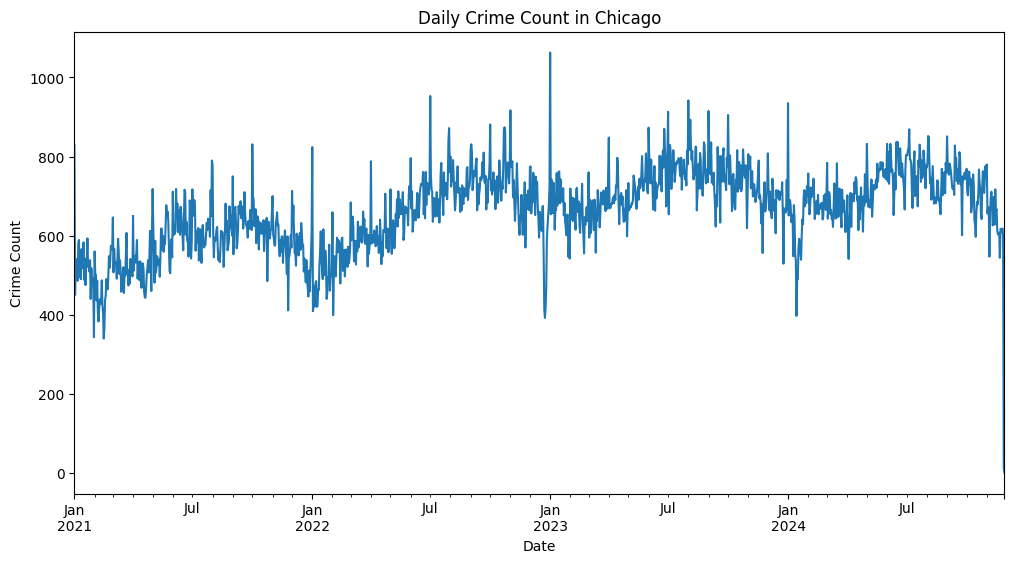

In [10]:
# 1. Daily Crime Count
crime_data_onlydate= pd.read_csv('/Users/admin/projects/Data_Engineering/made-template/data/crime_data_filtered.csv')
crime_data_onlydate['Date'] = pd.to_datetime(crime_data_onlydate['Date']).dt.floor('D')
daily_crime_count = crime_data_onlydate.groupby('Date').size()
daily_crime_count.plot(figsize=(12, 6))
plt.title("Daily Crime Count in Chicago")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.show()

/var/folders/tl/sd9rwv413tq87083czy_yjjw0000gn/T/ipykernel_8320/2305674890.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_Block = crime_data.groupby(['Block', 'Primary Type']).size().unstack().fillna(0)


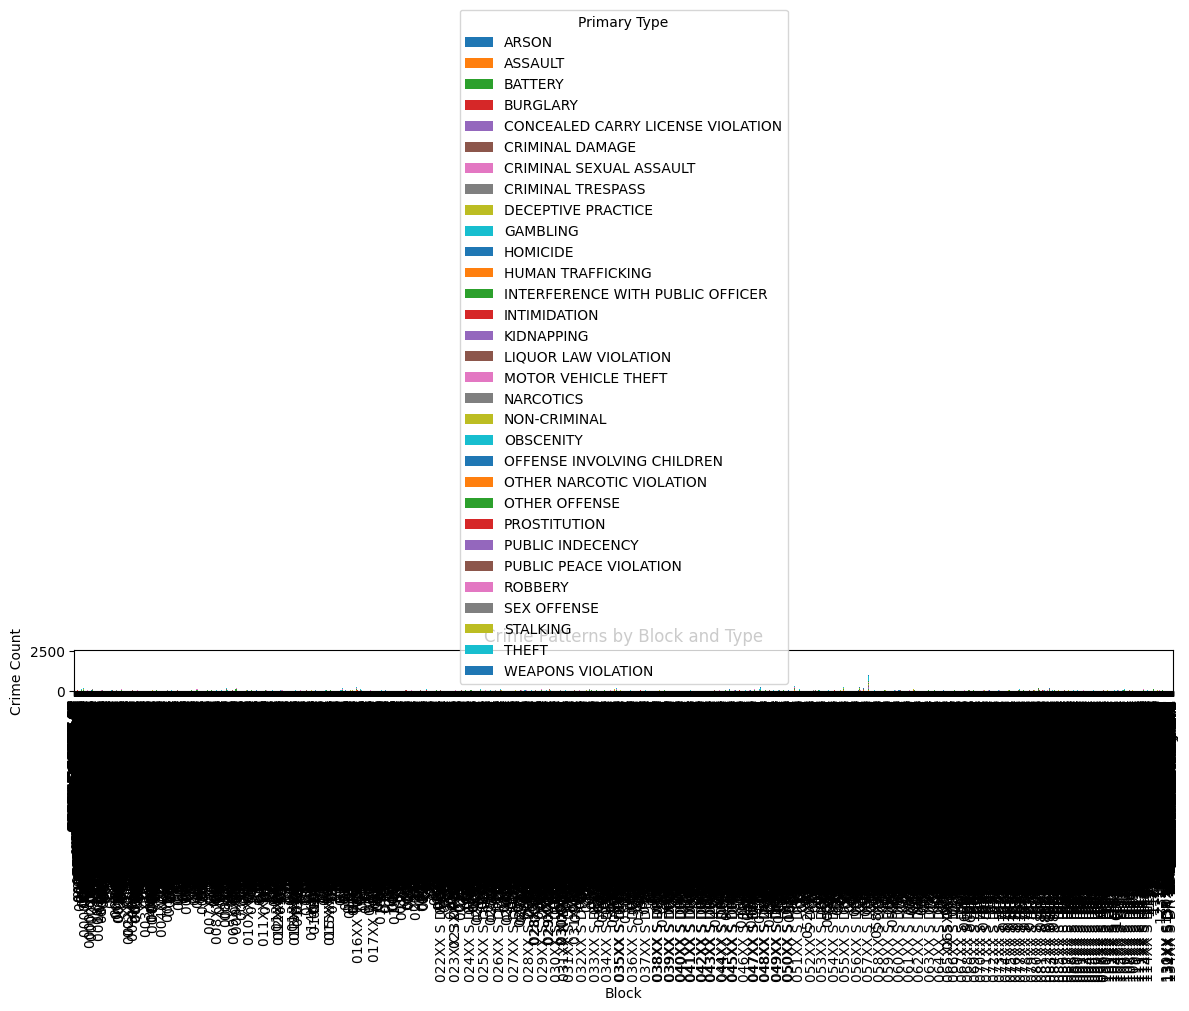

In [13]:
# 1. Patterns in crime types and locations
crime_data['Block'] = crime_data['Block'].astype('category')
crime_data['Primary Type'] = crime_data['Primary Type'].astype('category')
crime_Block = crime_data.groupby(['Block', 'Primary Type']).size().unstack().fillna(0)
crime_Block.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Crime Patterns by Block and Type")
plt.xlabel("Block")
plt.ylabel("Crime Count")
plt.tight_layout()
plt.show()

## Spatial Analysis
### to analyze crime patterns across different neighborhoods

In [37]:
# Group by Community Area and count crimes
area_crimes = crime_data.groupby('Community Area').size().reset_index(name='Count')
area_crimes.head()

,Community Area,Count
0,1.0,16050
1,2.0,14409
2,3.0,15790
3,4.0,7791
4,5.0,5126


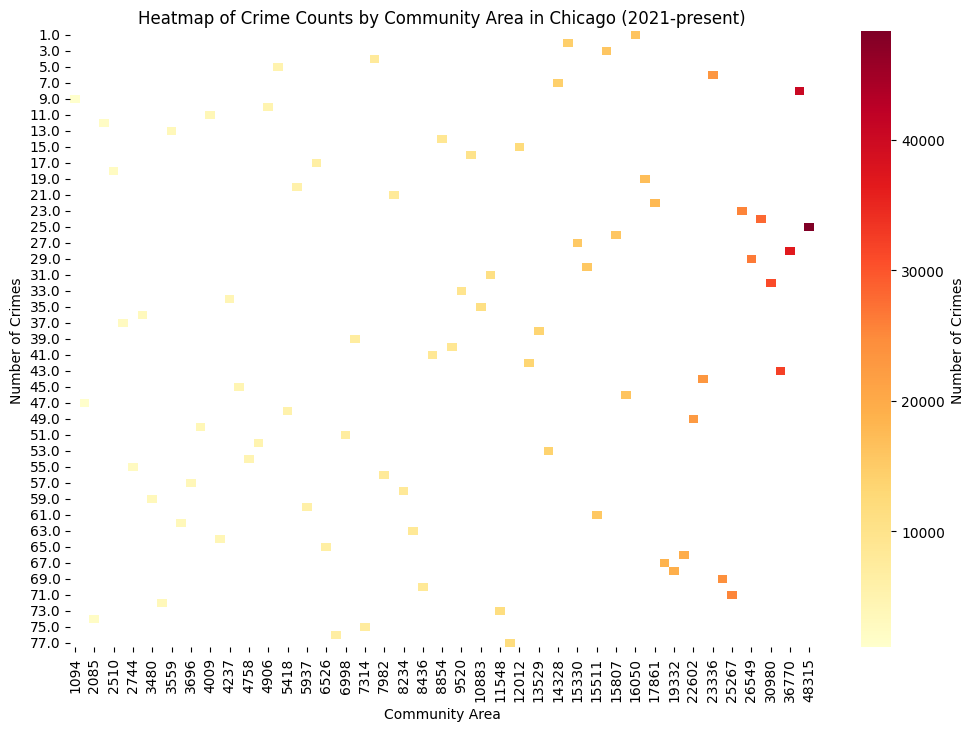

In [38]:
# Create a heatmap
pivot_data = area_crimes.pivot(index='Community Area', columns='Count', values='Count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_data, cmap='YlOrRd', cbar_kws={'label': 'Number of Crimes'})
plt.title('Heatmap of Crime Counts by Community Area in Chicago (2021-present)')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.show()

# Weather Data Analysis

## Temperature Trends
### To analyze temperature trends

In [39]:
import matplotlib.dates as mdates
from matplotlib.widgets import Cursor


# Load the weather data
weather_data = pd.read_csv('/Users/admin/projects/Data_Engineering/made-template/data/weather_data.csv')
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data=weather_data.sort_values(by='date')
weather_data.head()



,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,2021-01-01,-2.9,-7.1,1.7,9.7,30.0,36.0,19.1,1017.3
31,2021-01-02,-1.4,-5.5,0.6,0.0,360.0,337.0,18.0,1022.8
59,2021-01-03,0.3,-4.3,1.7,0.0,0.0,313.0,13.7,1023.7
90,2021-01-04,0.8,-4.3,4.4,0.0,0.0,15.0,18.7,1032.1
120,2021-01-05,13.3,5.6,29.4,0.0,0.0,202.0,27.7,1011.6


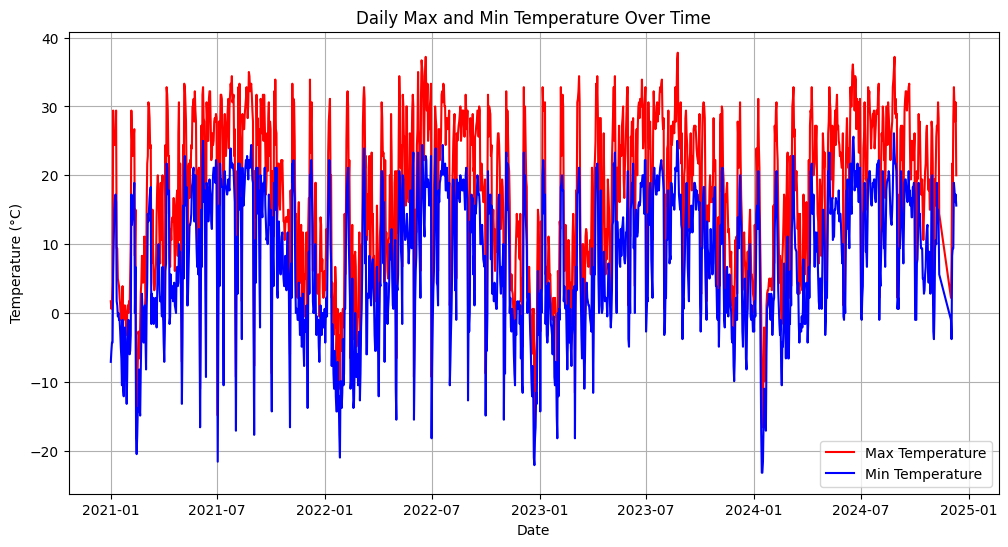

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(weather_data['date'], weather_data['tmax'], label='Max Temperature', color='red')
plt.plot(weather_data['date'], weather_data['tmin'], label='Min Temperature', color='blue')

plt.title('Daily Max and Min Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
print("daily_crimes columns:", daily_crimes.columns)
print("weather_data columns:", weather_data.columns)

daily_crimes columns: Index(['Date', 'Count'], dtype='object')
weather_data columns: Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres'], dtype='object')


In [48]:
# Changing weather_data has 'date' instead of 'Date'
weather_data.rename(columns={'date': 'Date'}, inplace=True)

### Monthly Heatmap of Daily Temperature

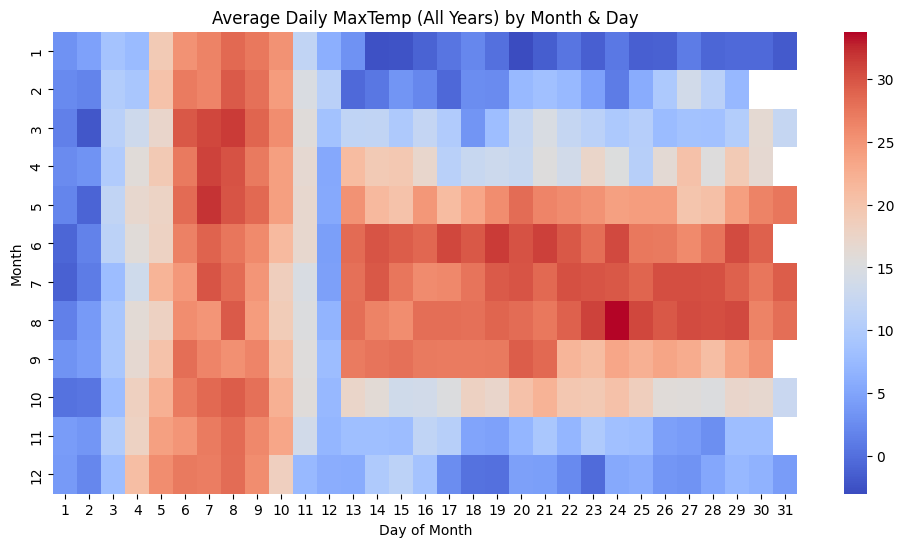

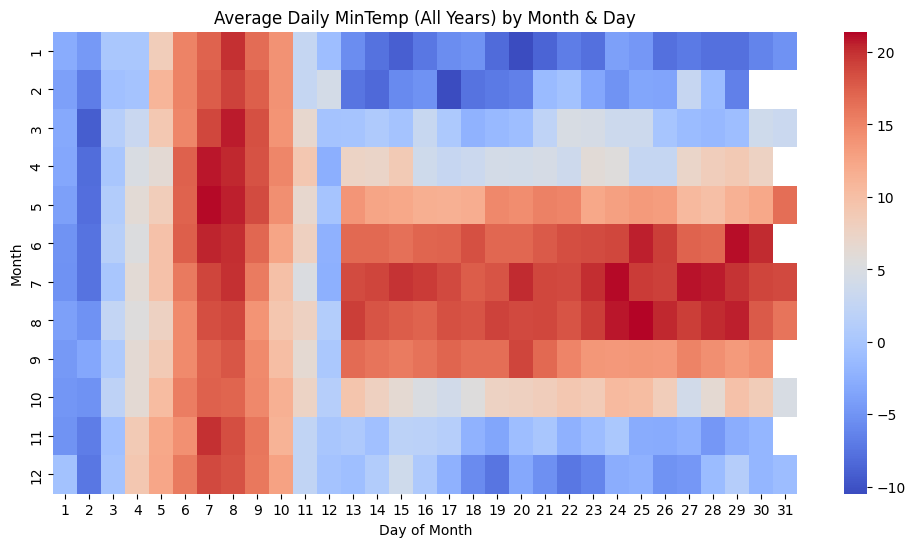

In [69]:
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day'] = weather_data['Date'].dt.day

# 2) Pivot (average of MaxTemp across all years by Month & Day)
pivot_table = weather_data.pivot_table(
    index='Month',
    columns='Day',
    values='tmax',
    aggfunc='mean'
)

# 3) Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title("Average Daily MaxTemp (All Years) by Month & Day")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()


# 4) Pivot (average of MinTemp across all years by Month & Day)
pivot_table = weather_data.pivot_table(
    index='Month',
    columns='Day',
    values='tmin',
    aggfunc='mean'
)

# 5) Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title("Average Daily MinTemp (All Years) by Month & Day")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()

## Correlation Analysis
### To explore the relationship between weather and crime

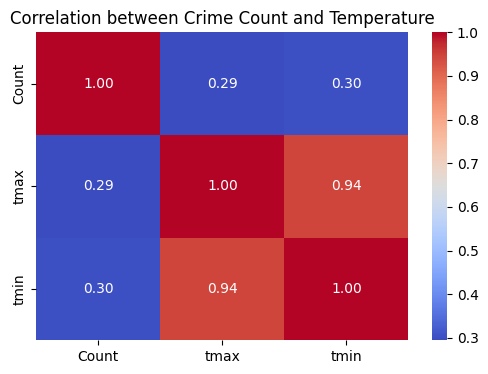

In [49]:
# Merge crime and weather data on date
merged_data = pd.merge(daily_crimes, weather_data, on='Date', how='inner')

# Calculate correlation
corr_columns = ['Count', 'tmax', 'tmin']
correlation = merged_data[corr_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Crime Count and Temperature')
plt.show()


### SCorrelation with Other Variables


Correlation Matrix with Additional Variables:
          Count      tmax      tmin      prcp      snow
Count  1.000000  0.294339  0.302326 -0.003520 -0.277557
tmax   0.294339  1.000000  0.944991  0.060932 -0.398515
tmin   0.302326  0.944991  1.000000  0.122095 -0.406972
prcp  -0.003520  0.060932  0.122095  1.000000 -0.034584
snow  -0.277557 -0.398515 -0.406972 -0.034584  1.000000


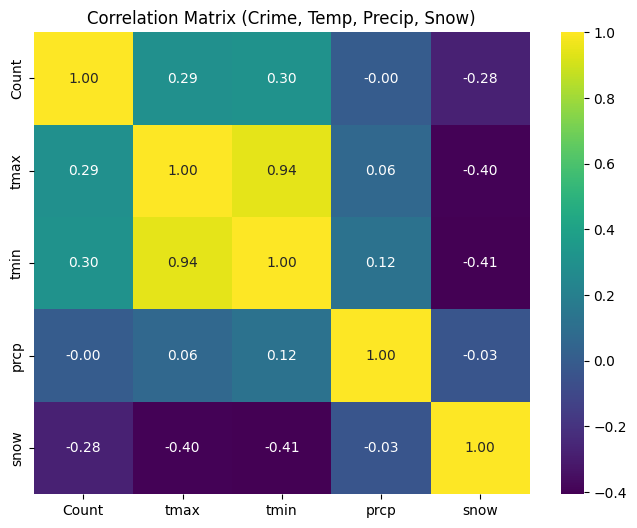

In [59]:
corr_columns = ['Count', 'tmax', 'tmin', 'prcp', 'snow']
corr_matrix = merged_data[corr_columns].corr()
print("Correlation Matrix with Additional Variables:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix (Crime, Temp, Precip, Snow)')
plt.show()

### Crime Rates in Each Season

In [60]:
crime_data['Month'] = crime_data['Date'].dt.month
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Other'  # for months 3,4,5,9,10,11

crime_data['Season'] = crime_data['Month'].apply(categorize_season)
season_counts = crime_data.groupby('Season').size().reset_index(name='CrimeCount')
print(season_counts)


   Season  CrimeCount
0   Other      485284
1  Summer      262830
2  Winter      198032


/var/folders/tl/sd9rwv413tq87083czy_yjjw0000gn/T/ipykernel_22673/2037945861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='Season', y='CrimeCount', palette='coolwarm')


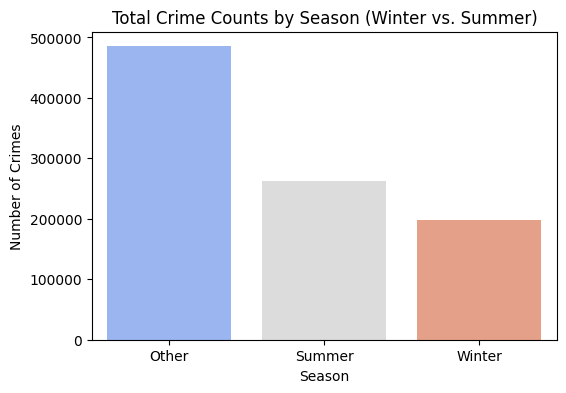

In [65]:
plt.figure(figsize=(6, 4))
sns.barplot(data=season_counts, x='Season', y='CrimeCount', palette='coolwarm')
plt.title("Total Crime Counts by Season (Winter vs. Summer)")
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.show()

In [21]:
from folium.plugins import HeatMap, MarkerCluster

In [22]:
# Ensure Latitude/Longitude are not null
print("Latitude/Longitude null counts:")
print(crime_data[['Location']].isna().sum())

# Split Location column into latitude and longitude
crime_data[['Latitude', 'Longitude']] = crime_data['Location'].str.strip('()').str.split(',', expand=True)

# Convert strings to float and clean whitespace
crime_data['Latitude'] = crime_data['Latitude'].astype(float)
crime_data['Longitude'] = crime_data['Longitude'].str.strip().astype(float)

crime_data['Latitude'].head()


Latitude/Longitude null counts:
Location    12091
dtype: int64


0    41.871835
1    41.746626
2    41.771782
3    41.763338
4    41.985875
Name: Latitude, dtype: float64

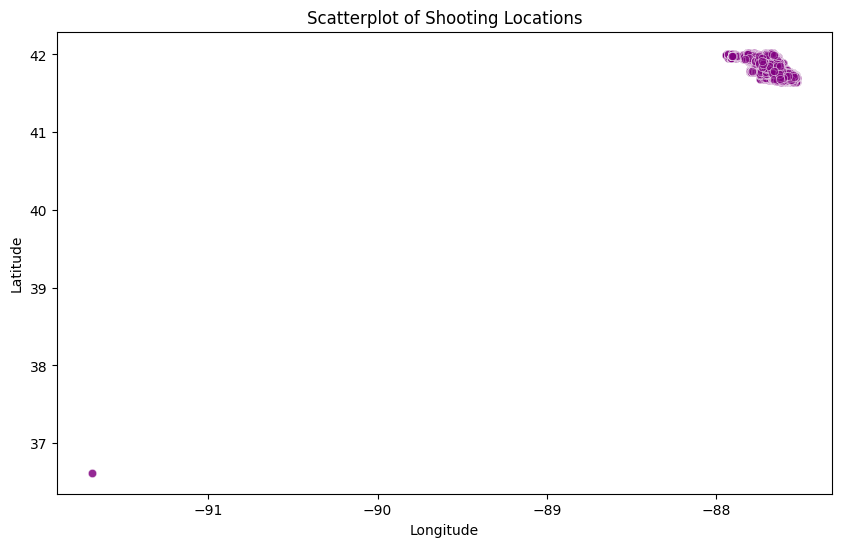

In [23]:
# --- Seaborn Scatterplot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=crime_data['Longitude'],
    y=crime_data['Latitude'],
    alpha=0.6,
    color='purple'
)
plt.title('Scatterplot of Shooting Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Clean the data by removing rows with NaN values
clean_crime_data = crime_data.dropna(subset=['Latitude', 'Longitude'])

# Generate latitude-longitude pairs from clean data
lat_lng_pairs = list(zip(clean_crime_data['Latitude'], 
                        clean_crime_data['Longitude']))

# Create a Folium map centered on the mean coordinates
heatmap_map = folium.Map(location=[clean_crime_data['Latitude'].mean(), 
                                 clean_crime_data['Longitude'].mean()], 
                        zoom_start=10)  # Increased zoom for better detail

# Add heatmap layer
HeatMap(lat_lng_pairs, 
        radius=15,  # Adjust radius for better visibility
        blur=10,    # Adjust blur for smoother appearance
        max_zoom=13
        ).add_to(heatmap_map)

# Display heatmap
heatmap_map

     

ValueError: Location values cannot contain NaNs.